## FPUT (simple case)

Consider the hamiltonian below
\begin{equation}
H(\vec{q},\vec{p})=\sum_{n=0}^{N-1}\Bigr[ \frac{p_n^2}{2}+k\frac{(q_{n+1}-q_n)^2}{2}\Bigr]\\
\vec{q} = [q_1, \dots, q_n,\dots, q_N]\\
\vec{p} = [p_1, \dots, p_n, \dots,p_N]\\
\end{equation}

With the initial condition of the following form:\
\begin{equation}
q_n(0)=Asin(\frac{\pi n}{N})\\p_n(0)=0
\end{equation}

<!-- The dependence between $q_n$ and $p_n$ are from the hamiltonian $H_n$ is
\begin{equation}
p_n = \sqrt{2E_n-k(q_{n+1}-q_n)^2}, \\
E_n=H_n, H = \sum_{n=0}^{N-1}H_n
\end{equation} -->

then, $\dot{q_n}$ and $\dot{p_n}$ would be

\begin{equation}
\dot{q_n}=\frac{\partial H}{\partial p_n}=p_n
\\
\dot{p_n}=-\frac{\partial H}{\partial q_n}=k(q_{n-1}+q_{n+1}-2q_n)
\end{equation}



In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Initial variables
# Assumes that len(p)=len(q)>=3

M = 16 # total number of oscillators
k = 0.6 # spring constant
A = 0.8 # amplitude
q = A*np.sin(np.linspace(0,np.pi,M)) # oscillator position
p = np.zeros(M) # oscillator momentum

## p_dot_update calculates p_dot at one time step
def p_dot_update(p_dot, q):
    for i in range(M):
        if i==0:
            p_dot[i]=k*(q[i+1]-2*q[i])
        elif i==len(q)-1:
            p_dot[i]=k*(q[i-1]-2*q[i])
        else:
            p_dot[i]=k*(-2*q[i]+q[i-1]+q[i+1])
    return p_dot


<Figure size 640x480 with 0 Axes>

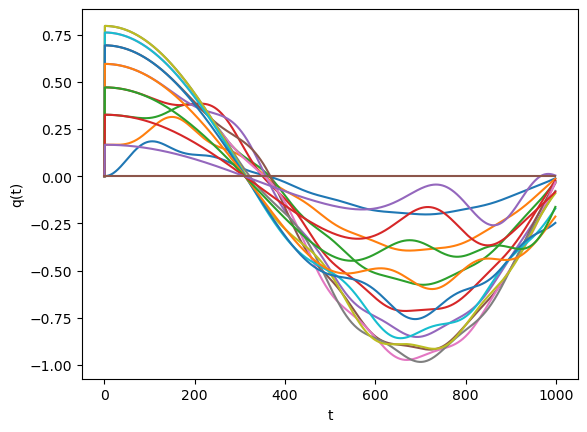

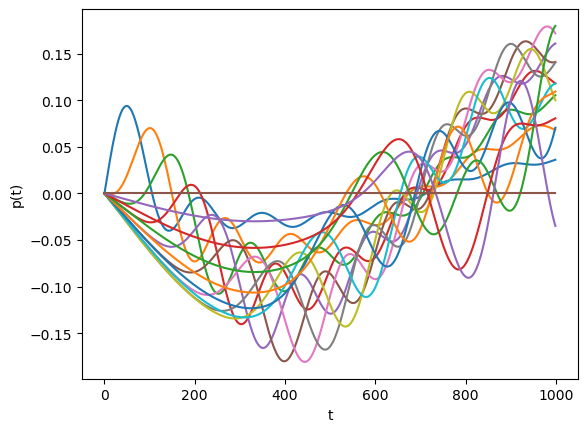

<Figure size 640x480 with 0 Axes>

In [10]:
## Using Euler Method to integrate qdot and pdot
t_a = 0.0 # start of the interval
t_b = 30.0 # end of the interval
N = 1000 # number of steps
dt = (t_b-t_a)/N # size of a single step

## Initial p_dot and q_dot at time t=0
q_dot = p
p_dot_0 = np.zeros(M)
p_dot = p_dot_update(p_dot_0,q)

q_matrix = np.zeros([N,M])
p_matrix = np.zeros([N,M])

for t in range(1,N):
    for n in range(M-1):
        q[n] = q_dot[n]*dt + q[n]
        p[n] = p_dot[n]*dt + p[n]
        p_dot = p_dot_update(p_dot,q)
        q_dot = p
    q_matrix[t:]=q
    p_matrix[t:]=p

plt.plot(q_matrix)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.figure()

plt.plot(p_matrix)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.figure()

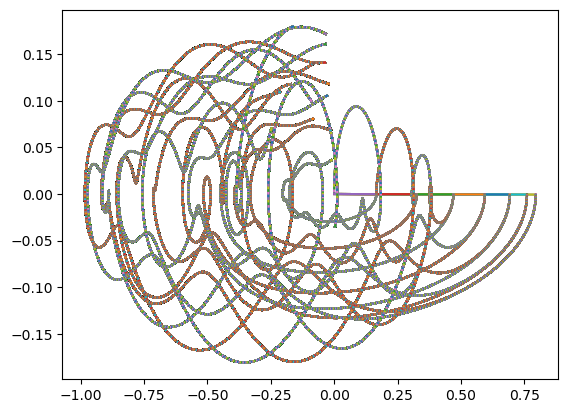

In [11]:
# Phase diagram

for t in range(q_matrix.shape[0]):
    plt.plot(q_matrix[t:],p_matrix[t:])
    
plt.show()
    